In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
taxi= pd.read_csv('/content/3_taxi_peru.csv', sep=';',parse_dates=['start_at', 'end_at', 'arrived_at']) 

In [21]:
def function(x):
  x_1 = pd.read_csv(x, sep=';')  
  return x_1.groupby('company').agg({'income': 'mean'})

In [22]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [23]:
taxi_max = taxi.groupby('source').agg({'user_id': 'count'}).sort_values('user_id', ascending = False)
taxi_max.idxmax()

user_id    iPhone
dtype: object

In [24]:
taxi.source.value_counts()

iPhone     9741
web        7631
Android    4909
iPad        571
Wap         136
Name: source, dtype: int64

In [25]:
taxi.shape[0]

23111

In [26]:
round((9741/23111) * 100,0)

42.0

In [27]:
#Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.
round(taxi.source.value_counts() / taxi.shape[0] * 100,0)

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

In [63]:
#Проверим, как распределены оценки водителей (driver_score)

taxi.driver_score.value_counts()

5.0    4499
4.0    1674
0.0    1094
3.0     227
1.0      94
2.0      62
Name: driver_score, dtype: int64

In [62]:
taxi.driver_score.value_counts().sum()

7650

In [64]:
score_counts = taxi.driver_score.value_counts(normalize=True).mul(100).round(2).reset_index() 

In [65]:
score_counts

,index,driver_score
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [66]:
driver_score_counts = score_counts.rename(columns={'index': 'driver_score',
                                  'driver_score':'percentage'}).sort_values('driver_score')

In [70]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


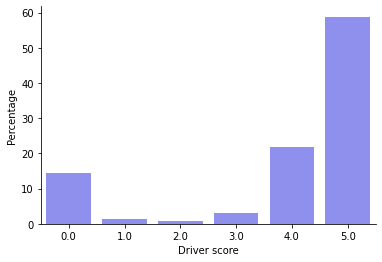

In [74]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [75]:
#Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.
#В чем его отличие от распределения оценок водителей?

taxi.rider_score.value_counts()

5.0    13404
4.0     1359
0.0      352
3.0      213
1.0       32
2.0       30
Name: rider_score, dtype: int64

In [76]:
score_counts_rider = taxi.rider_score.value_counts(normalize=True).mul(100).round(2).reset_index() 

In [77]:
rider_score_counts = score_counts_rider.rename(columns={'index': 'rider_score',
                                  'rider_score':'percentage'}).sort_values('rider_score')

In [78]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


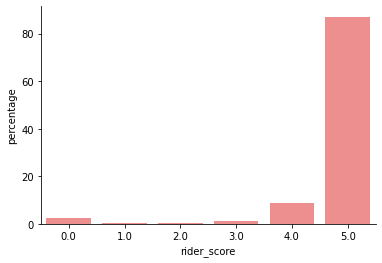

In [79]:
axy = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='red', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine() 
plt.show()